# **IMPORTING LIBRARIES**

In [6]:
import tensorflow as tf
from PIL import Image,ImageFile
import numpy as np
import os
import time
from IPython.display import display
print("All libraries are imported")

All libraries are imported


# **CONVERSION OF MODEL TO TENSORFLOW LITE  MODEL** 

In [ ]:
#LOAD AND RUN TENSOR FLOW LITE MODEL
interpreter = tf.lite.Interpreter(model_path="/home/xilinx/fyp23/model.tflite")

#Allocates memory for the TensorFlow Lite model's inputs, outputs, and intermediate tensors
interpreter.allocate_tensors()

In [ ]:

#Retrieves the details of the input tensors 
input_details = interpreter.get_input_details()

#Retrieves the details of the output tensors
output_details = interpreter.get_output_details()

***EVALUATING THROUGHPUT TIME*** 

The filename X_Aptos_19_1_27e4c800a449.jpg has prediction:  0.0
The filename X_Aptos_19_1_27e4c800a449.jpg has no Diabetic Retinopathy


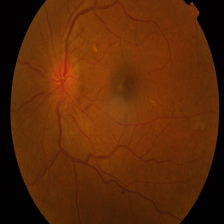

Throughput time: 3.24 seconds


In [ ]:
# Set the path to the test images directory
test_dir="/home/xilinx/jupyter_notebooks/DR_inference/test_images"

start_time = time.time()
a=1 #(DR CLASS)
b=0 #(NO DR CLASS)
#fig = plt.figure(figsize=(30, 6))

train_imgs= os.listdir(test_dir)
# Loop through the test images directory
for idx,img in enumerate(np.random.choice(train_imgs, 1)):
    img_dir = train_imgs
    filename = img
    

    # Load the test image
    #img_path = os.path.join(test_dir, filename)
    img_path = test_dir +'/'+ filename
    img = Image.open(img_path)
    resized_img1 = img.resize((224, 224))  # resize to (224, 224)

    
    input_shape = input_details[0]['shape']
    
    input_tensor= np.array(np.expand_dims(resized_img1,0), dtype=np.float32)
    input_index = interpreter.get_input_details()[0]["index"]
    interpreter.set_tensor(input_index, input_tensor)
    #Run the inference
    interpreter.invoke()
    output_details = interpreter.get_output_details()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    #output_data = interpreter.get_tensor(output_details[0]['index'])
    results = np.squeeze(output_data)
    top_k = results.argsort()
    
    if results==1.0:
       print('The filename'+' '+filename+' '+'has prediction:'+' ', results)
       print('The filename'+' '+filename+' '+'has Diabetic Retinopathy')
       img1 = Image.open(img_path)
       img_resized = img.resize((224, 224))
       display(img_resized)
   
    elif results==0.0:
       print('The filename'+' '+filename+' '+'has prediction:'+' ', results)
       print('The filename'+' '+filename+' '+'has no Diabetic Retinopathy')
       img2 = Image.open(img_path)
       img_resized = img.resize((224, 224))
       display(img_resized)
    

end_time = time.time()
throughput_time = end_time - start_time
print(f"Throughput time: {throughput_time:.2f} seconds")

***MEMORY CONSUMPTION***

In [ ]:
import psutil

process = psutil.Process()
memory_info = process.memory_info()
memory_consumption = memory_info.rss / 1024 / 1024
print(f"Memory consumption: {memory_consumption:.2f} MB")




Memory consumption: 272.48 MB
